In [39]:
#Importing necessary libraries

import numpy as np # linear algebra
import pandas as pd #for data processing/handling csv file 
from matplotlib import pyplot as plt #for ploting charts
import seaborn as sns #visualization/for ploting heatmap
sns.set(style='darkgrid')
from sklearn.preprocessing import LabelEncoder #encoding categories from strings to mumbers
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #fitting model with different parameters using k fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

In [40]:
df = pd.read_csv("BankChurners.csv",sep=';') #open csv file and save it to dataframe
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,4
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1


In [41]:
df.shape #show dataframe dimensions(10127 rows ,11 columns)

(10127, 11)

In [42]:
df.isna().sum() #count null values of each column

CLIENTNUM                 0
Attrition_Flag            0
Customer_Age              0
Gender                    0
Dependent_count           0
Education_Level           0
Marital_Status            0
Income_Category           0
Card_Category             0
Months_on_book            0
Months_Inactive_12_mon    0
dtype: int64

In [43]:
df.nunique()#show unique values of each column

CLIENTNUM                 10127
Attrition_Flag                2
Customer_Age                 45
Gender                        2
Dependent_count               6
Education_Level               7
Marital_Status                4
Income_Category               6
Card_Category                 4
Months_on_book               44
Months_Inactive_12_mon        7
dtype: int64

In [44]:
df.dtypes #show the data type of each column

CLIENTNUM                  int64
Attrition_Flag            object
Customer_Age               int64
Gender                    object
Dependent_count            int64
Education_Level           object
Marital_Status            object
Income_Category           object
Card_Category             object
Months_on_book             int64
Months_Inactive_12_mon     int64
dtype: object

In [45]:
df.groupby('Attrition_Flag').mean()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Months_Inactive_12_mon
Attrition_Flag,,,,,
Attrited Customer,7.352614e+08,46.659496,2.402581,36.178242,2.693301
Existing Customer,7.399272e+08,46.262118,2.335412,35.880588,2.273765


In [46]:
df['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [47]:
dummies = pd.get_dummies(df.Attrition_Flag)



In [48]:
churn = pd.concat([df,dummies],axis='columns')
churn = churn.drop(['Attrition_Flag','Attrited Customer'], axis='columns')
churn

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Months_Inactive_12_mon,Existing Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,1,1
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,1,1
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,1,1
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,4,1
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,M,2,Graduate,Single,$40K - $60K,Blue,40,2,1
10123,710638233,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,2,0
10124,716506083,44,F,1,High School,Married,Less than $40K,Blue,36,3,0
10125,717406983,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,3,0


In [49]:
churn[['Existing Customer','Gender','Marital_Status']].groupby(['Gender','Marital_Status']).mean().round(2)
#Females slightly more likely to churn

Existing Customer
Gender Marital_Status                   
F      Divorced                     0.83
       Married                      0.83
       Single                       0.82
       Unknown                      0.82
M      Divorced                     0.85
       Married                      0.87
       Single                       0.84
       Unknown                      0.84

<AxesSubplot:xlabel='Gender'>

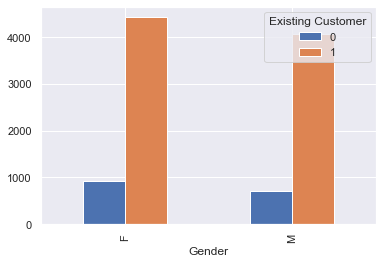

In [50]:
#merged.columns
pd.crosstab(churn['Gender'],churn['Existing Customer']).plot(kind='bar')

In [51]:
churn['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [52]:
churn[['Existing Customer','Education_Level']].groupby(['Education_Level']).agg(['mean','count']).round(2)
#Customers with a doctorate degree has the highest average churn rate

Existing Customer      
                             mean count
Education_Level                        
College                      0.85  1013
Doctorate                    0.79   451
Graduate                     0.84  3128
High School                  0.85  2013
Post-Graduate                0.82   516
Uneducated                   0.84  1487
Unknown                      0.83  1519

In [53]:
churn[['Existing Customer','Card_Category']].groupby(['Card_Category']).agg(['mean','count']).round(2)


Existing Customer      
                           mean count
Card_Category                        
Blue                       0.84  9436
Gold                       0.82   116
Platinum                   0.75    20
Silver                     0.85   555

<AxesSubplot:xlabel='Card_Category'>

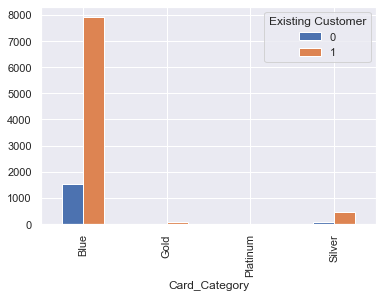

In [54]:
pd.crosstab(churn['Card_Category'],churn['Existing Customer']).plot(kind='bar')

In [55]:
churn[['Existing Customer','Income_Category']].groupby(['Income_Category']).agg(['mean','count']).round(2)

Existing Customer      
                             mean count
Income_Category                        
$120K +                      0.83   727
$40K - $60K                  0.85  1790
$60K - $80K                  0.87  1402
$80K - $120K                 0.84  1535
Less than $40K               0.83  3561
Unknown                      0.83  1112

<AxesSubplot:xlabel='Income_Category'>

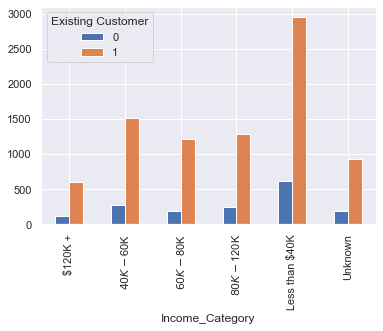

In [56]:
pd.crosstab(churn['Income_Category'],churn['Existing Customer']).plot(kind='bar')

<AxesSubplot:>

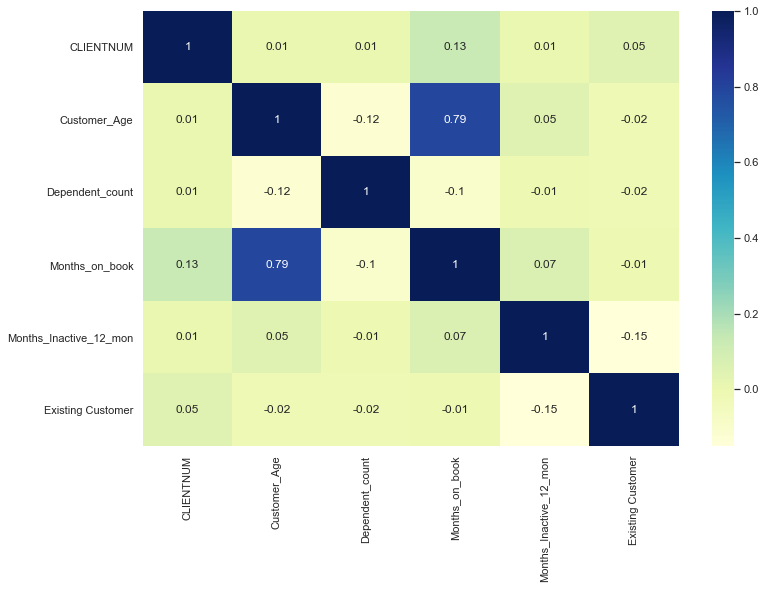

In [57]:
corr = churn.corr().round(2)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
#It shows the correlation coefficients between the target variable (Existing Customer) and other variables.

In [58]:
corr_target=abs(corr['Existing Customer']).sort_values(ascending=False)
corr_target

Existing Customer         1.00
Months_Inactive_12_mon    0.15
CLIENTNUM                 0.05
Dependent_count           0.02
Customer_Age              0.02
Months_on_book            0.01
Name: Existing Customer, dtype: float64

In [59]:
churn[['Existing Customer','Months_Inactive_12_mon']].groupby(['Months_Inactive_12_mon']).agg(['mean','count']).round(2)
#There is a positive correlation between the number of inactive months and customer churn. 
# We clearly see that the churn rate increases as the number of inactive months increases (excluding the categories with very few customers)

Existing Customer      
                                    mean count
Months_Inactive_12_mon                        
0                                   0.48    29
1                                   0.96  2233
2                                   0.85  3282
3                                   0.79  3846
4                                   0.70   435
5                                   0.82   178
6                                   0.85   124

In [60]:
value_counts = churn['Months_Inactive_12_mon'].value_counts()
to_remove = value_counts[value_counts <= 1000].index
churn = churn[~df.Months_Inactive_12_mon.isin(to_remove)]
churn[['Existing Customer','Months_Inactive_12_mon']].groupby(['Months_Inactive_12_mon']).agg(['mean','count']).round(2)


Existing Customer      
                                    mean count
Months_Inactive_12_mon                        
1                                   0.96  2233
2                                   0.85  3282
3                                   0.79  3846

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

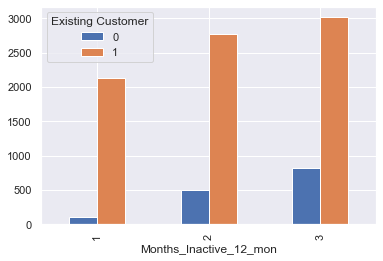

In [61]:
pd.crosstab(churn['Months_Inactive_12_mon'],churn['Existing Customer']).plot(kind='bar')

In [62]:
churn[['Existing Customer','Customer_Age','Dependent_count']].groupby(['Existing Customer']).mean().round(2)

,Customer_Age,Dependent_count
Existing Customer,,
0,45.82,2.45
1,46.19,2.33


<AxesSubplot:xlabel='Customer_Age'>

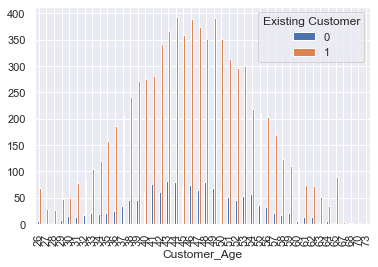

In [63]:
pd.crosstab(churn['Customer_Age'],churn['Existing Customer']).plot(kind='bar')
#Customer age has same distribution around mean value(46), so customer age is not an important factor of our research

<AxesSubplot:xlabel='Dependent_count'>

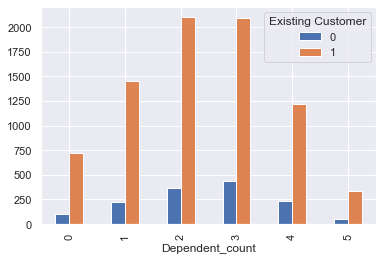

In [64]:
pd.crosstab(churn['Dependent_count'],churn['Existing Customer']).plot(kind='bar')

In [65]:
churn[['Existing Customer','Months_on_book']].groupby(['Existing Customer']).mean().round(2)

,Months_on_book
Existing Customer,
0,35.09
1,35.80


<AxesSubplot:xlabel='Months_on_book'>

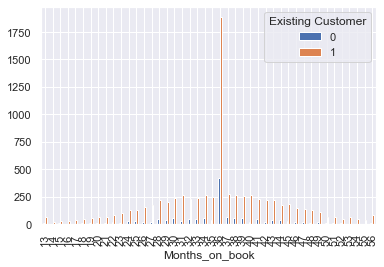

In [66]:
pd.crosstab(churn['Months_on_book'],churn['Existing Customer']).plot(kind='bar')

In [67]:
inputs=churn.drop(['Marital_Status','CLIENTNUM','Existing Customer','Customer_Age','Dependent_count','Months_on_book'],axis='columns')
inputs
#inputs.Card_Category.unique()

,Gender,Education_Level,Income_Category,Card_Category,Months_Inactive_12_mon
0,M,High School,$60K - $80K,Blue,1
1,F,Graduate,Less than $40K,Blue,1
2,M,Graduate,$80K - $120K,Blue,1
4,M,Uneducated,$60K - $80K,Blue,1
5,M,Graduate,$40K - $60K,Blue,1
...,...,...,...,...,...
10122,M,Graduate,$40K - $60K,Blue,2
10123,M,Unknown,$40K - $60K,Blue,2
10124,F,High School,Less than $40K,Blue,3
10125,M,Graduate,$40K - $60K,Blue,3


In [68]:
target=churn['Existing Customer']
target

0        1
1        1
2        1
4        1
5        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Existing Customer, Length: 9361, dtype: uint8

In [69]:
le_Gender = LabelEncoder()
le_Education_Level = LabelEncoder()
le_Income_Category = LabelEncoder()
le_Card_Category = LabelEncoder()

In [70]:
inputs['Gender'] = le_Gender.fit_transform(inputs['Gender'])
inputs['Education_Level'] = le_Education_Level.fit_transform(inputs['Education_Level'])
inputs['Income_Category'] = le_Income_Category.fit_transform(inputs['Income_Category'])
inputs['Card_Category'] = le_Card_Category.fit_transform(inputs['Card_Category'])


In [71]:
inputs

,Gender,Education_Level,Income_Category,Card_Category,Months_Inactive_12_mon
0,1,3,2,0,1
1,0,2,4,0,1
2,1,2,3,0,1
4,1,5,2,0,1
5,1,2,1,0,1
...,...,...,...,...,...
10122,1,2,1,0,2
10123,1,6,1,0,2
10124,0,3,4,0,3
10125,1,2,1,0,3


In [276]:
inputs.Card_Category.unique()


array([0, 1, 3, 2])

In [77]:
X=inputs
Y=target

In [78]:
#parameter tuning in order to find the best solution
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [82]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, Y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
d = pd.DataFrame(scores,columns=['model','best_score','best_params'])
d

,model,best_score,best_params
0,svm,0.847132,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.844888,{'n_estimators': 5}
2,logistic_regression,0.847132,{'C': 1}


In [88]:
from sklearn.model_selection import StratifiedKFold #divide folds in uniform way
folds = StratifiedKFold(n_splits=5)

In [89]:
for train_index, test_index in folds.split(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [90]:
model2=LogisticRegression(solver='liblinear',multi_class='auto')

In [91]:
model2.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [92]:
model2.score(X_test,Y_test)

0.8515750133475708

In [103]:
mod1=model2.predict([[0,1,4,0,5]])#dokimi gia Gynaika me Doctorate, mistho<40K, katigoria kartas Blue, 5 mhnes anenergh
mod2=model2.predict([[0,1,4,0,1]])#dokimi gia Gynaika me Doctorate, mistho<40K, katigoria kartas Blue, 1 mhnas anenergh
mod3=model2.predict([[1,1,4,0,1]])#dokimi gia Antra me Doctorate, mistho<40K, katigoria kartas Blue, 1 mhnas anenergos
mod4=model2.predict([[1,1,4,0,5]])#dokimi gia Antra me Doctorate, mistho<40K, katigoria kartas Blue, 5 mhnes anenergos
print(mod1,mod2,mod3,mod4)

[0] [1] [1] [1]


In [94]:
from sklearn.naive_bayes import GaussianNB #alternative model
model1 = GaussianNB()

In [95]:
model1.fit(X_train,Y_train)
model1.score(X_test,Y_test)

0.8515750133475708

In [96]:
y_predicted=model1.predict(X_test)
#np.count_nonzero(y_predicted)
#count=np.unique(y_predicted, return_counts=True)
#count

In [97]:
X_test

,Gender,Education_Level,Income_Category,Card_Category,Months_Inactive_12_mon
1352,1,2,3,0,2
7484,0,0,4,0,3
323,1,3,3,3,3
797,0,6,1,0,3
7850,0,2,1,0,1
...,...,...,...,...,...
1826,1,2,2,0,2
3983,1,1,3,0,2
1036,0,3,1,0,2
7882,0,3,1,0,1


In [98]:
#Y_test.isin([0]).sum()
Y_test

1352    1
7484    0
323     1
797     1
7850    1
       ..
1826    1
3983    0
1036    0
7882    1
9643    1
Name: Existing Customer, Length: 1873, dtype: uint8

Text(66.5, 0.5, 'Truth')

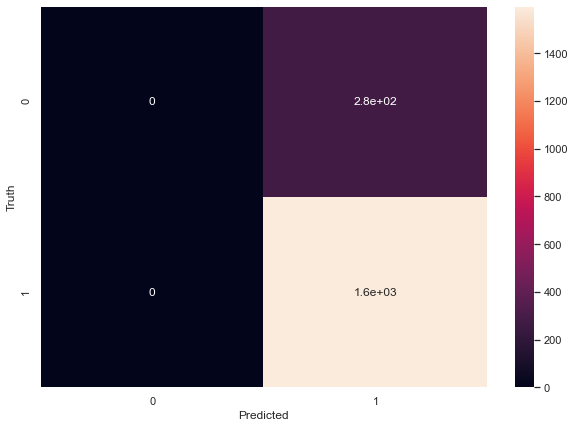

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [79]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, Y,cv=3) #alternatively

array([0.84716437, 0.84711538, 0.84711538])

In [80]:
cross_val_score(SVC(gamma='auto'), X, Y,cv=3) #alternatively


array([0.84716437, 0.84711538, 0.84711538])

In [81]:
cross_val_score(RandomForestClassifier(n_estimators=40),X, Y,cv=3)#alternatively

array([0.84460109, 0.84583333, 0.84519231])